# Abhibus Project

**Abhibus Phase-1 :**  Phase 1 includes segmentation based on the Pattern, Offer and RFM segmentation

# Importing the Dataset from Google Drive

In [0]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.9MB/s 


In [0]:
# inseting the sharable link into "link" variable
link = 'https://drive.google.com/open?id=1GBbtiSKnq4cmRIIbi7r6fMSVKRQJkDSk'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1GBbtiSKnq4cmRIIbi7r6fMSVKRQJkDSk


In [0]:
# Fecthing the dataset from Google Drive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
columns = ['PNR','Source','Destination','DOJ','OperatorName','BusType','ServiceType','BoardingPoint','BoardingTime','DroppoingPoint',
          'DroppingTime','Email','Mobile','Age','Gender','Insurance','insurance_amount','CouponCode','Discount_Amt','WalletAmountRedemeed',
          'PGAmount','PGType','GSTAmount','ServiceCharge','TicketAmount','No_Of_Seats','BookingPlatform','BookedDate','BookingTime',
          'CancellationDate','CancellationTime','CancelledSeats','CancellationAmount','RefundGSTAmount','CustomerId','EdgeOfferAmount',
          'APISource','Abhiid','Earnings','ReferenceNo']

dataset = pd.read_csv('Filename.csv', names = columns)
print(dataset.head(5))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             PNR     Source  Destination  ... Abhiid Earnings ReferenceNo
0     DWK1260604  Tadipatri    Hyderabad  ...      6        0         NaN
1     DWK1261003  Hyderabad    Tadipatri  ...      6        0         NaN
2     DWK1262071  Hyderabad    Tadipatri  ...      6        0         NaN
3  KAVERI2306276  Hyderabad  Ravulapalem  ...      6        0         NaN
4  KAVERI2313805  Hyderabad  Ganapavaram  ...      6        0         NaN

[5 rows x 40 columns]


# Dataset Analysis and Observation

In [0]:
# Observing the Dataset 
data = dataset

# Shape of Dataset
print("Shape of Dataset is : ", data.shape)
print("\n")
# Features of Dataset
print("Featues/Columns in Dataset :", data.columns)
print("\n")
# Number of Features in Dataset
print("Number of Feature/Column in the Dataset :", len(dataset.columns))

Shape of Dataset is :  (1012722, 40)


Featues/Columns in Dataset : Index(['PNR', 'Source', 'Destination', 'DOJ', 'OperatorName', 'BusType',
       'ServiceType', 'BoardingPoint', 'BoardingTime', 'DroppoingPoint',
       'DroppingTime', 'Email', 'Mobile', 'Age', 'Gender', 'Insurance',
       'insurance_amount', 'CouponCode', 'Discount_Amt',
       'WalletAmountRedemeed', 'PGAmount', 'PGType', 'GSTAmount',
       'ServiceCharge', 'TicketAmount', 'No_Of_Seats', 'BookingPlatform',
       'BookedDate', 'BookingTime', 'CancellationDate', 'CancellationTime',
       'CancelledSeats', 'CancellationAmount', 'RefundGSTAmount', 'CustomerId',
       'EdgeOfferAmount', 'APISource', 'Abhiid', 'Earnings', 'ReferenceNo'],
      dtype='object')


Number of Feature/Column in the Dataset : 40


Dataset contain the NaN or Null Values =	 True
Count of NaN or Null values in Dataset =	 3346224
Column containing NaN/Null values 	 Index(['Email', 'Mobile', 'Age', 'Gender', 'Insurance', 'CouponCode',
       'CancellationDate', 'CancellationTime', 'ReferenceNo'],
      dtype='object')

 
 Count of NULL present in dataset w.r.t column 
 Email                406561
Mobile                   28
Age                    2405
Gender                   78
Insurance              2405
CouponCode           475936
CancellationDate    1010317
CancellationTime    1010317
ReferenceNo          438177
dtype: int64


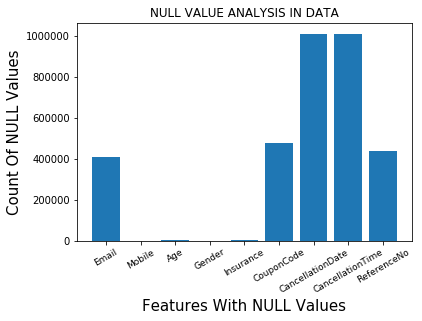

In [0]:
# Checking wheter dataset contain the NULL or NaN values in dataset or not
print("Dataset contain the NaN or Null Values =\t",data.isnull().values.any())

# Checking the NaN or Null present in the datast irrespective of Features
print("Count of NaN or Null values in Dataset =\t", data.isnull().sum().sum())

# Checking the Nan or Null Values w.r.t column
columns=data.columns[data.isnull().any()]
print("Column containing NaN/Null values \t",columns)

print("\n \n Count of NULL present in dataset w.r.t column \n",data[columns].isnull().sum())
# Plotting the Bar chart for NULL Valyues
index = np.arange(len(columns))
plt.bar(index, data[columns].isnull().sum())
plt.xlabel('Features With NULL Values', fontsize=15)
plt.ylabel('Count Of NULL Values', fontsize=15)
plt.xticks(index, columns, fontsize=9, rotation=30)
plt.title('NULL VALUE ANALYSIS IN DATA')
plt.show()

In [0]:
# Checking the categorical data prescence in dataset
num_cols = data._get_numeric_data().columns
categor_list = list(set(columns) - set(num_cols))
for w in categor_list: 
    if len(data[w].unique()) < 3:
        categor_list.remove(w)

print("Categorical Featue in Dataset :",categor_list)


Categorical Featue in Dataset : ['Insurance', 'Mobile', 'CancellationDate', 'Email', 'Gender', 'ReferenceNo', 'CouponCode', 'CancellationTime']


In [0]:
# Information about the dataset ---- Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012722 entries, 0 to 1012721
Data columns (total 40 columns):
PNR                     1012722 non-null object
Source                  1012722 non-null object
Destination             1012722 non-null object
DOJ                     1012722 non-null object
OperatorName            1012722 non-null object
BusType                 1012722 non-null object
ServiceType             1012722 non-null object
BoardingPoint           1012722 non-null object
BoardingTime            1012722 non-null object
DroppoingPoint          1012722 non-null object
DroppingTime            1012722 non-null object
Email                   606161 non-null object
Mobile                  1012694 non-null object
Age                     1010317 non-null object
Gender                  1012644 non-null object
Insurance               1010317 non-null object
insurance_amount        1012722 non-null int64
CouponCode              536786 non-null object
Discount_Amt            10

# Data Preprocessing and Feature Engineering


***Deleting the un-necessary/ineffective columns of dataset***


In [0]:
# Deleting the unnecessary features from Dataset

# Features in Dataset
print("Number of Feature/Column in the Dataset before deletion :", len(data.columns))

# This list is obtained from Technical Document sheet: FE- Ticketing Data
delete_list = ['PNR','BoardingPoint','DroppoingPoint','Email','insurance_amount','Discount_Amt','WalletAmountRedemeed','PGAmount',
              'PGType','GSTAmount','ServiceCharge','BookingTime','CancellationTime','CancelledSeats','CancellationAmount',
              'RefundGSTAmount','CustomerId','EdgeOfferAmount','Abhiid','Earnings','ReferenceNo']

print("Count of feature to be deleted from dataset", len(delete_list))

# Dropping ineffective columns from dataset
features = data.drop(columns = delete_list)

# Features in Dataset
print("Number of Feature/Column in the Dataset after deletion :", len(features.columns))



Number of Feature/Column in the Dataset before deletion : 40
Count of feature to be deleted from dataset 21
Number of Feature/Column in the Dataset after deletion : 19


***Re-validation of Feature dataframe and pre-processing the same***

Dataset contain the NaN or Null Values =	 True
Count of NaN or Null values in Dataset =	 1491169
Column containing NaN/Null values 	 Index(['Mobile', 'Age', 'Gender', 'Insurance', 'CouponCode',
       'CancellationDate'],
      dtype='object')

 
 Count of NULL present in Feature w.r.t column 
 Mobile                   28
Age                    2405
Gender                   78
Insurance              2405
CouponCode           475936
CancellationDate    1010317
dtype: int64


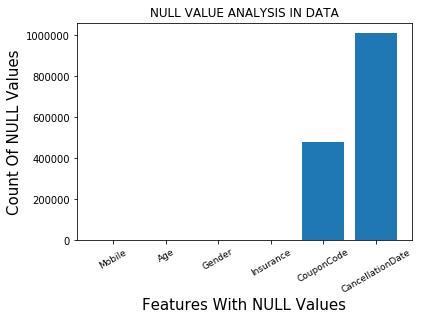

In [0]:
# Checking wheter Feature contain the NULL or NaN values in dataset or not
print("Dataset contain the NaN or Null Values =\t",features.isnull().values.any())

# Checking the NaN or Null present in the Feature irrespective of Features
print("Count of NaN or Null values in Dataset =\t", features.isnull().sum().sum())

# Checking the Nan or Null Values w.r.t column
columns=features.columns[features.isnull().any()]
print("Column containing NaN/Null values \t",columns)

print("\n \n Count of NULL present in Feature w.r.t column \n",features[columns].isnull().sum())
# Plotting the Bar chart for NULL Valyues
index = np.arange(len(columns))
plt.bar(index, features[columns].isnull().sum())
plt.xlabel('Features With NULL Values', fontsize=15)
plt.ylabel('Count Of NULL Values', fontsize=15)
plt.xticks(index, columns, fontsize=9, rotation=30)
plt.title('NULL VALUE ANALYSIS IN DATA')
plt.show()

In [0]:
# Checking the categorical data prescence in dataset
num_cols = features._get_numeric_data().columns
categor_list = list(set(columns) - set(num_cols))
for w in categor_list: 
    if len(features[w].unique()) < 3:
        categor_list.remove(w)

print(" \n Categorical Features in dataframe-features :",categor_list)
print("\n Count of column consist of categorical Data : ", len(categor_list))

 
 Categorical Features in dataframe-features : ['Insurance', 'Mobile', 'CancellationDate', 'Gender', 'CouponCode']

 Count of column consist of categorical Data :  5


Columns in the dataset Index(['Source', 'Destination', 'DOJ', 'OperatorName', 'BusType',
       'ServiceType', 'BoardingTime', 'DroppingTime', 'Mobile', 'Age',
       'Gender', 'Insurance', 'CouponCode', 'TicketAmount', 'No_Of_Seats',
       'BookingPlatform', 'BookedDate', 'CancellationDate', 'APISource'],
      dtype='object')
[510, 596, 164, 92, 119, 2, 417, 206, 655932, 2, 657, 9116, 6080, 1604, 48, 4, 131, 42, 92]


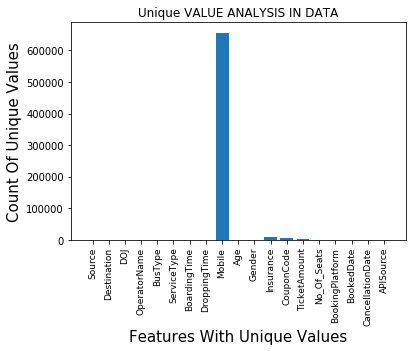

In [0]:
# Getting Unique values present in the specfied columns of dataframe-features

features_list = features.columns
print("Columns in the dataset", features_list)

count_list = []
for feature in features_list:
    count_list.append(len(features[feature].unique()))
    
print(count_list)

# Plotting the Bar chart for NULL Valyues
index = np.arange(len(features_list))
plt.bar(index, count_list)
plt.xlabel('Features With Unique Values', fontsize=15)
plt.ylabel('Count Of Unique Values', fontsize=15)
plt.xticks(index, features_list, fontsize=9, rotation=90)
plt.title('Unique VALUE ANALYSIS IN DATA')
plt.show()

# Selecting the DOJ feature and Performing EDA

In [0]:
print(features["DOJ"].describe())

count        1012722
unique           164
top       2015-05-10
freq           15343
Name: DOJ, dtype: object


In [0]:
print(features["BoardingTime"].describe())

count      1012722
unique         417
top       10:00 PM
freq         72862
Name: BoardingTime, dtype: object


In [0]:
# Checking the type of data present in the features["DOJ"]
print("Datatype present in the DOJ", features.DOJ.dtype)


Datatype present in the DOJ object


In [0]:
# Dynamically Evaluating for which year transactions are there

years = []
for year in features.DOJ:
    year = year[:4]
    if year in years:
        None
    else:
        years.append(year)
print("Transaction present in the dataset from these years:",years)




Transaction present in the dataset from these years: ['2014', '2015']


In [0]:
# Finding Number of Transaction present in the each year
trans14cnt = 0
trans15cnt = 0
for years in features.DOJ:
    if years.startswith("2014"):
        trans14cnt += 1 
    if years.startswith("2015"):
        trans15cnt += 1 
        
print("Transacion in 2014 are:", trans14cnt)
print("Transacion in 2015 are:", trans15cnt)

transaction = [trans14cnt , trans15cnt]
print(transaction)

Transacion in 2014 are: 3
Transacion in 2015 are: 1012719
[3, 1012719]


Weekdays ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
Transaction [141927, 145652, 145845, 143809, 146516, 140211, 148762]


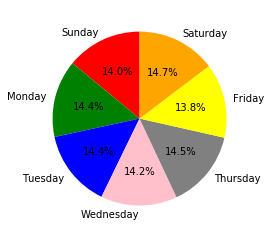

Weekend Segmentation 863960
Day Segmentation :  1012722


In [0]:
# Checking the trends of Transaction w.r.t Date and segmenting DOJ w.r.t Day of travel

def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return int(dayOfWeek)

Sunday = 0; Monday = 0; Tuesday = 0; Wednesday = 0; Thursday = 0; Friday = 0;Saturday = 0;  #noqa
weekendSegmentation = []
daySegmentation = []
for days in features.DOJ:
    day, month, year = (int(x) for x in days.split('-'))  
    val = weekDay(year, month, day)
    daySegmentation.append(val)
    if val == 0:
        Sunday += 1
        weekendSegmentation.append("W")
    elif val == 1:
        Monday += 1
        weekendSegmentation.append("M")
    elif val == 2:
        Tuesday += 1
        weekendSegmentation.append("M")
    elif val == 3:
        Wednesday += 1
        weekendSegmentation.append("M")
    elif val == 4:
        Thursday += 1  
        weekendSegmentation.append("M")
    elif val == 5:
        Friday += 1
        weekendSegmentation.append("W")
    elif val == 6:
        Saturday += 1
        
Weekdays = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
Transaction = [Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday]

print("Weekdays",Weekdays)
print("Transaction", Transaction)

colors = ['Red', 'Green','Blue','Pink','Grey','yellow','orange']
plt.pie(Transaction, labels=Weekdays, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

print("Weekend Segmentation", len(weekendSegmentation))
print("Day Segmentation : ", len(daySegmentation))


Transaction1 [8, 7, 189, 291341, 386562, 317801]
Transacttion2 [16811, 0, 0, 3, 0, 0]


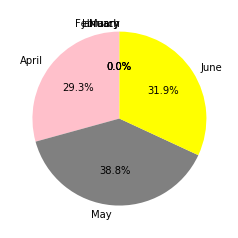

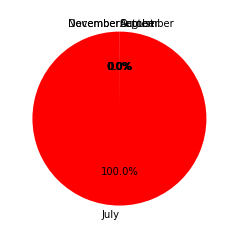

In [0]:
January = 0; February = 0; March = 0; April = 0; May = 0; June = 0;July = 0; August = 0; September =0;
October = 0; November = 0; December = 0 #noqa

monthSegmentation = []

for days in features.DOJ:
    day, month, year = (int(x) for x in days.split('-'))  
    
    if month == 1:
        January += 1
        monthSegmentation.append(month)
    elif month == 2:
        February += 1
        monthSegmentation.append(month)
    elif month == 3:
        March += 1
        monthSegmentation.append(month)
    elif month == 4:
        April += 1
        monthSegmentation.append(month)
    elif month == 5:
        May += 1  
        monthSegmentation.append(month)
    elif month == 6:
        June += 1
        monthSegmentation.append(month)
    elif month == 7:
        July += 1
        monthSegmentation.append(month)
    elif month == 8:
        August += 1
        monthSegmentation.append(month)
    elif month == 9:
        September += 1 
        monthSegmentation.append(month)
    elif month == 10:
        October += 1
        monthSegmentation.append(month)
    elif month == 11:
        November += 1
        monthSegmentation.append(month)
    elif month == 12:
        December += 1 
        monthSegmentation.append(month)
    
Month1 = ["January","February","March","April","May","June"]
Transaction1 = [January,February,March,April,May,June]

Month2 = ["July","August","September","October","November","December"]
Transaction2 = [July,August,September,October,November,December]


print("Transaction1",Transaction1)
print("Transacttion2",Transaction2)


colors = ['Red', 'Green','Blue','Pink','Grey','Yellow']

plt.pie(Transaction1, labels=Month1, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

print("\n \n")
plt.pie(Transaction2, labels=Month2, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


# Selecting the OperatorName & Performing EDA

In [0]:
# Selecting the OperatorName Column
print(features["OperatorName"].describe())

count            1012722
unique                92
top       Kaveri Travels
freq              176493
Name: OperatorName, dtype: object


In [0]:
print(features.head(5))

      Source  Destination  ... CancellationDate        APISource
0  Tadipatri    Hyderabad  ...              NaN  Diwakar Travels
1  Hyderabad    Tadipatri  ...              NaN  Diwakar Travels
2  Hyderabad    Tadipatri  ...              NaN  Diwakar Travels
3  Hyderabad  Ravulapalem  ...       2015-06-23   Kaveri Travels
4  Hyderabad  Ganapavaram  ...       2015-06-23   Kaveri Travels

[5 rows x 19 columns]


In [0]:
BusOperators = features.OperatorName.unique()
print(len(BusOperators))

92


In [0]:
# Making the Columns OperatoreName into Ordinal Value

print("Number of Column present in the dataset beffore considering BusOperator column to be ordinal",len(features.columns))
print("Columns of dataset =",features.columns)
OrdBusOperator = {}

for i in range(0, len(BusOperators)):
    OrdBusOperator[BusOperators[i]] = i
#print("Ordinal Bus Operator :",OrdBusOperator)

#print(type(OrdBusOperator))

# Map feature values to scale
features['OrdBusOperator'] = features['OperatorName'].replace(OrdBusOperator)

print("Number of Column present in the dataset beffore considering BusOperator column to be ordinal",len(features.columns))
print("Columns of dataset =",features.columns)


Number of Column present in the dataset beffore considering BusOperator column to be ordinal 19
Columns of dataset = Index(['Source', 'Destination', 'DOJ', 'OperatorName', 'BusType',
       'ServiceType', 'BoardingTime', 'DroppingTime', 'Mobile', 'Age',
       'Gender', 'Insurance', 'CouponCode', 'TicketAmount', 'No_Of_Seats',
       'BookingPlatform', 'BookedDate', 'CancellationDate', 'APISource'],
      dtype='object')
Number of Column present in the dataset beffore considering BusOperator column to be ordinal 20
Columns of dataset = Index(['Source', 'Destination', 'DOJ', 'OperatorName', 'BusType',
       'ServiceType', 'BoardingTime', 'DroppingTime', 'Mobile', 'Age',
       'Gender', 'Insurance', 'CouponCode', 'TicketAmount', 'No_Of_Seats',
       'BookingPlatform', 'BookedDate', 'CancellationDate', 'APISource',
       'OrdBusOperator'],
      dtype='object')


# Selecting the BusType and Performing EDA

In [0]:
# Checking the categories in the column BusType

typelist = features.BusType.unique()
print(len(typelist))

values = features.groupby(["BusType"]).count()




119


In [0]:
"""
for BusOperator, BusType in zip(features.OperatorName, features.BusType):
    print('[%s]:\t\t "%s ..."' % (BusOperator, BusType.split('\n')[0]))
"""
from sklearn.model_selection import train_test_split
 
def train(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
 
    classifier.fit(X_train, y_train)
    print("Accuracy: %s" % classifier.score(X_test, y_test))
    return classifier



In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
 
trial1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])
 
train(trial1, features.OperatorName, features.BusType)
# Accuracy: 0.846349745331
 

Accuracy: 0.5161682748705472


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
from nltk.corpus import stopwords
 
"""
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB()),
])
 
train(trial2, features.OperatorName, features.BusType)
"""

"\ntrial2 = Pipeline([\n    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),\n    ('classifier', MultinomialNB()),\n])\n \ntrain(trial2, features.OperatorName, features.BusType)\n"

In [0]:
"""
trial3 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
train(trial3, features.OperatorName, features.BusType)
"""

"\ntrial3 = Pipeline([\n    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),\n    ('classifier', MultinomialNB(alpha=0.05)),\n])\n \ntrain(trial3, features.OperatorName, features.BusType)\n"

In [0]:
"""
trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'),
                             min_df=5)),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
train(trial4, features.OperatorName, features.BusType)
# Accuracy: 0.903013582343
"""

"\ntrial4 = Pipeline([\n    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'),\n                             min_df=5)),\n    ('classifier', MultinomialNB(alpha=0.05)),\n])\n \ntrain(trial4, features.OperatorName, features.BusType)\n# Accuracy: 0.903013582343\n"

In [0]:
"""
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
 
def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]
 
trial5 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer,
                             stop_words=stopwords.words('english') + list(string.punctuation))),
    ('classifier', MultinomialNB(alpha=0.05)),
    ])
 
train(trial5, train(trial4, features.OperatorName, features.BusType))
"""

"\nimport string\nfrom nltk.stem import PorterStemmer\nfrom nltk import word_tokenize\n \ndef stemming_tokenizer(text):\n    stemmer = PorterStemmer()\n    return [stemmer.stem(w) for w in word_tokenize(text)]\n \ntrial5 = Pipeline([\n    ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer,\n                             stop_words=stopwords.words('english') + list(string.punctuation))),\n    ('classifier', MultinomialNB(alpha=0.05)),\n    ])\n \ntrain(trial5, train(trial4, features.OperatorName, features.BusType))\n"

# Selecting the Boarding Time and Performing EDA


Objective:Based on time - categorize as Morning, Noon, Evening, Night

In [0]:
features.BoardingTime


0          09:30 PM
1          11:00 PM
2          11:00 PM
3          09:50 PM
4          11:25 PM
5          09:20 PM
6          10:30 PM
7          10:40 PM
8          09:20 PM
9          06:00 PM
10         09:30 PM
11         10:15 PM
12               \N
13         10:07 PM
14         07:10 PM
15         09:30 PM
16         11:00 PM
17         06:45 PM
18         08:50 PM
19         04:00 PM
20         05:15 PM
21         05:15 PM
22         10:30 PM
23         07:20 PM
24         08:00 PM
25         10:35 PM
26         10:35 PM
27         09:00 PM
28         10:00 PM
29         08:45 PM
             ...   
1012692    10:20 PM
1012693          \N
1012694    02:35 PM
1012695    09:00 PM
1012696    07:30 PM
1012697    10:15 PM
1012698    10:15 AM
1012699    09:24 PM
1012700    10:00 PM
1012701    10:25 PM
1012702    10:30 PM
1012703    11:00 PM
1012704    10:30 PM
1012705    10:40 PM
1012706    09:50 PM
1012707    11:00 PM
1012708    09:15 PM
1012709    08:30 PM
1012710    08:45 PM


In [0]:
times = []
for time in features.BoardingTime:
    if "AM" in time:
            times.append("Morning")
    elif "PM" in time:
        if int(time[:1]) >= 1 and int(time[:1]) <=4:
            times.append("afternoon")
        elif int(time[:1]) >= 4 and int(time[:1]) <=8:
            times.append("evening")
        elif int(time[:1]) >= 8 and int(time[:1]) <=12:
            times.append("night") 
    elif " " in time:
        times.append("Null")
print(times)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
from collections import Counter

print(len(features["BoardingTime"]))
      
BoardingTime_Categorize_cnt = dict(Counter(times))
print(BoardingTime_Categorize_cnt)
  

1012722
{'afternoon': 349240, 'Morning': 12840, 'night': 178, 'evening': 5, 'Null': 19}


So all the bus details we have travel in night only

# Selecting the Ticket_Amount and Perforiming EDA

In [0]:
print(features["TicketAmount"].describe())

count    1.012722e+06
mean     1.247531e+03
std      1.177481e+03
min     -1.780000e+03
25%      6.500000e+02
50%      9.000000e+02
75%      1.400000e+03
max      2.400000e+05
Name: TicketAmount, dtype: float64


In [0]:
features.groupby(['BusType']).mean()

,TicketAmount,No_Of_Seats,OrdBusOperator
BusType,,,
Multi-axle Volvo AC Sleeper,2066.911765,1.257353,13.000000
1+1 AC Sleeper,2729.276923,1.778462,13.272308
2 Tier 1+1 AC Sleeper,2625.000000,1.884615,2.000000
2*2 Volvo AC Seater,2117.045455,1.329545,4.000000
2+1 - AC Diamond Class Sleeper,1812.809127,1.566099,22.312206
2+1 AC Classy Sleeper,2889.500000,1.333333,36.000000
2+1 AC SLEEPER EXECUTIVE AIR BUS,1684.707430,1.434985,17.529412
2+1 AC Sleeper,1817.660055,1.422323,8.377026
2+1 AC Sleeper Cum Seater,1200.551247,1.470914,36.000000


In [0]:
# Grouping the BusType w.r.t Ticket Amount
features['BusTypeCOUNTER'] =1       #initially, set that counter to 1.
group_data = features.groupby(['BusType','TicketAmount'])['BusTypeCOUNTER'].sum() #sum function
print(group_data)

BusType                       TicketAmount
 Multi-axle Volvo AC Sleeper  180.0             1
                              360.0             2
                              400.0             1
                              1350.0           10
                              1450.0            2
                              1500.0            5
                              1550.0           60
                              1600.0           17
                              1650.0           66
                              1700.0           10
                              1750.0            1
                              1800.0            2
                              1850.0           30
                              1900.0            9
                              2050.0            4
                              2400.0            2
                              2700.0            1
                              3000.0            1
                              3100.0            5
       

In [0]:
# Grouping the BusType w.r.t Ticket Amount
features['SourceCOUNTER'] =1       #initially, set that counter to 1.
group_data = features.groupby(['Source','TicketAmount'])['SourceCOUNTER'].sum() #sum function
print(group_data)

Source          TicketAmount
A.S.Peta        560.0            1
                670.0           10
                780.0            9
                1340.0           3
                2010.0           2
                2680.0           2
                3350.0           1
                4020.0           1
Achanta         500.0            4
                560.0            1
                1000.0           3
                1680.0           1
                2000.0           5
                2500.0          13
                2800.0           1
                3000.0          19
                3360.0           4
                4020.0           2
Adda Road       500.0            2
                560.0            8
                610.0            9
                650.0            3
                670.0           11
                690.0            2
                700.0            2
                720.0            4
                750.0            1
                780.0     

# Selecting the BookedDate and Performing EDA

In [0]:
print(features.columns)
print(features["BookedDate"].describe())

Index(['Source', 'Destination', 'DOJ', 'OperatorName', 'BusType',
       'ServiceType', 'BoardingTime', 'DroppingTime', 'Mobile', 'Age',
       'Gender', 'Insurance', 'CouponCode', 'TicketAmount', 'No_Of_Seats',
       'BookingPlatform', 'BookedDate', 'CancellationDate', 'APISource',
       'OrdBusOperator', 'BusTypeCOUNTER', 'SourceCOUNTER'],
      dtype='object')
count        1012722
unique           131
top       2015-05-26
freq           15681
Name: BookedDate, dtype: object


In [0]:
# Calculating the Days diffrence between the DOJ and BookedDate
DaysDifference = []
from datetime import datetime
date_format = "%Y-%m-%d"

for BookedDate, DOJ in zip(features.BookedDate, features.DOJ):
    a = datetime.strptime(BookedDate, date_format)
    b = datetime.strptime(DOJ, date_format)
    delta = b - a
    #print(delta.days)
    DaysDifference.append(delta.days)


# Selecting the CancellationDate and Performing EDA

In [0]:
print("Description")
print(features["CancellationDate"].describe())

Description
count           2405
unique            41
top       2015-04-01
freq             822
Name: CancellationDate, dtype: object


In [0]:
UniqueList = []
print("Null Values in CancellationDate",features["CancellationDate"].isnull().sum())
print("Total numberz of rows in ConcellationDate",len(features["CancellationDate"]))

Null Values in CancellationDate 1010317
Total numberz of rows in ConcellationDate 1012722


In [0]:
# Finalizing whether User have cancelled Ticket or not
import math
Cancellation_Pool = []
for cancel in features["CancellationDate"]:
    if type(cancel) is float:
        if math.isnan(val):
            Cancellation_Pool.append("0")
    else:
        Cancellation_Pool.append("1")
print("Cancellation_Pool",Cancellation_Pool)        


Cancellation_Pool ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

In [0]:
--NotebookApp.iopub_data_rate_limit

NameError: ignored

In [0]:
converted_CancellationDate = []
for cancel in features.CancellationDate:
    converted_CancellationDate.append(str(cancel))

converted_DOJDate = []
for doj in features.DOJ:
    converted_DOJDate.append(str(doj))
    
   


In [0]:
# Calculating the cancellation w.r.t the no of days before the DOJ
Before_Days_DOJ = []
import math
date_format = "%Y-%m-%d"
for cancellation,CD,DOJ in zip(Cancellation_Pool,converted_CancellationDate, converted_DOJDate):
    if cancellation == "1":
        if math.isNaN(DOJ):
            print("Blank")
            Before_Days_DOJ.append("Null")
        else:
            print(type(CD))
            print(type(DOJ))
            a = datetime.strptime(str(CD), date_format)
            b = datetime.strptime(str(DOJ), date_format)
            delta = b - a
            print(delta.days)
            Before_Days_DOJ.append(delta.days)

print("Cancellation of Ticket before DOJ", Before_Days_DOJ)